# Data Exploration

In [1]:
import pandas as pd

## Raw Data Exploration 

In [2]:
from utils.data_loaders import get_claims_df, get_churn_labels_df, get_app_usage_df, get_web_visits_df

### Claims

In [3]:
claims_df = get_claims_df()
claims_df.head()

,member_id,icd_code,diagnosis_date
0,1,Z71.3,2025-07-09
1,1,Z71.3,2025-07-14
2,1,J00,2025-07-12
3,1,M54.5,2025-07-01
4,1,I10,2025-07-12


In [4]:
number_of_icd10_codes = len(claims_df)
number_of_icd10_codes

64576

In [5]:
number_of_unique_members = len(claims_df['member_id'].unique())
number_of_unique_members

9980

In [6]:
claims_df['member_id'].describe()

count    64576.000000
mean      5015.547479
std       2895.595389
min          1.000000
25%       2484.000000
50%       5036.000000
75%       7538.000000
max      10000.000000
Name: member_id, dtype: float64

### Churn Labels

In [7]:
from utils.plot_utils import pie_plot, scatter_plot, scatter_plot_series

In [8]:
churn_labels_df = get_churn_labels_df()
churn_labels_df.head()

,member_id,signup_date,churn,outreach
8632,8633,2024-01-01,0,0
2287,2288,2024-01-01,0,1
4669,4670,2024-01-01,0,0
9778,9779,2024-01-01,0,1
4629,4630,2024-01-01,0,0


In [9]:
churn_labels_df['member_id'].describe()

count    10000.00000
mean      5000.50000
std       2886.89568
min          1.00000
25%       2500.75000
50%       5000.50000
75%       7500.25000
max      10000.00000
Name: member_id, dtype: float64

In [10]:
retention, churn = churn_labels_df['churn'].value_counts()

In [11]:
pie_plot(
    labels=["Retention", "churn"], 
    values=[retention, churn], 
    title="Retention vs. Churn", 
    pull=[0, 0.1], 
)

In [12]:
churn_labels_df['churn_cumsum'] = churn_labels_df['churn'].cumsum()

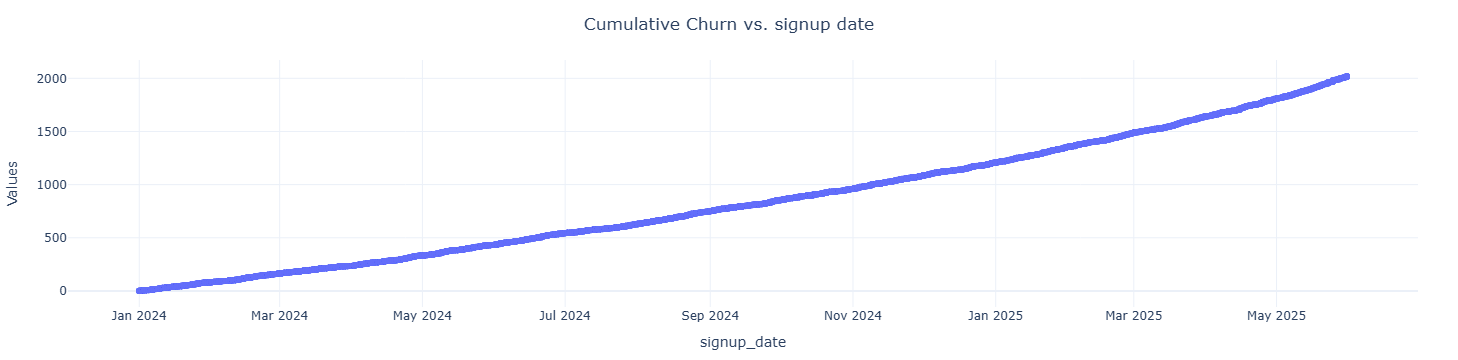

In [13]:
scatter_plot(
    df=churn_labels_df, 
    x_column_name='signup_date', 
    y_column_names=['churn_cumsum'], 
    title='Cumulative Churn vs. signup date'
)

### App Usage

In [14]:
app_usage_df = get_app_usage_df()
app_usage_df.head()

,member_id,event_type,timestamp
42271,4313,session,2025-07-01 00:00:00
14836,1506,session,2025-07-01 00:00:02
86872,8873,session,2025-07-01 00:00:03
14265,1441,session,2025-07-01 00:00:06
92478,9456,session,2025-07-01 00:00:09


In [15]:
len(app_usage_df)

97789

In [16]:
app_usage_df['member_id'].describe()

count    97789.000000
mean      4993.659727
std       2886.532764
min          1.000000
25%       2508.000000
50%       4984.000000
75%       7502.000000
max      10000.000000
Name: member_id, dtype: float64

In [17]:
unique_member_ids_in_usage_db = len(app_usage_df['member_id'].unique())
unique_member_ids_in_usage_db

9998

In [18]:
app_usage_df['event_type'].unique()

array(['session'], dtype=object)

In [19]:
app_usage_df['date'] = app_usage_df['timestamp'].dt.date
daily_app_usage = app_usage_df.groupby(['date']).size()

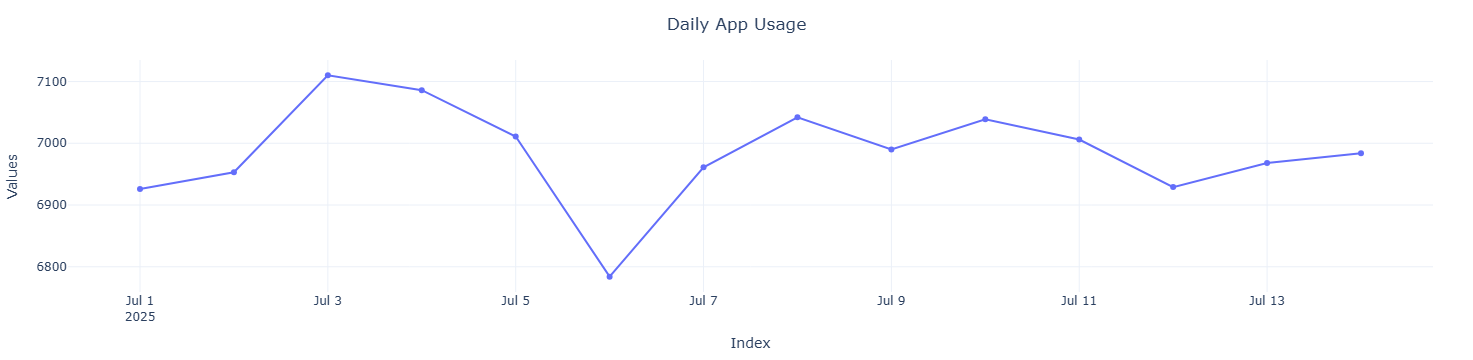

In [20]:
scatter_plot_series(series=daily_app_usage, title="Daily App Usage")

### Web Visits 

In [21]:
web_visits_df = get_web_visits_df()
web_visits_df.head()

,member_id,url,title,description,timestamp
206093,7984,https://media.hub/cars/475,Electric vehicles,Charging networks and range,2025-07-01 00:00:01
23065,902,https://health.wellco/diabetes/471,HbA1c targets,Improving glycemic control and blood glucose,2025-07-01 00:00:05
132306,5137,https://media.hub/cars/646,Electric vehicles,Charging networks and range,2025-07-01 00:00:06
203289,7881,https://media.hub/tech/232,Gadget roundup,Smartphones and laptops news,2025-07-01 00:00:06
17731,680,https://media.hub/travel/392,Top destinations,City guides and itineraries,2025-07-01 00:00:07


In [22]:
web_visits_df['date'] = web_visits_df['timestamp'].dt.date
daily_web_usage = web_visits_df.groupby(['date']).size()

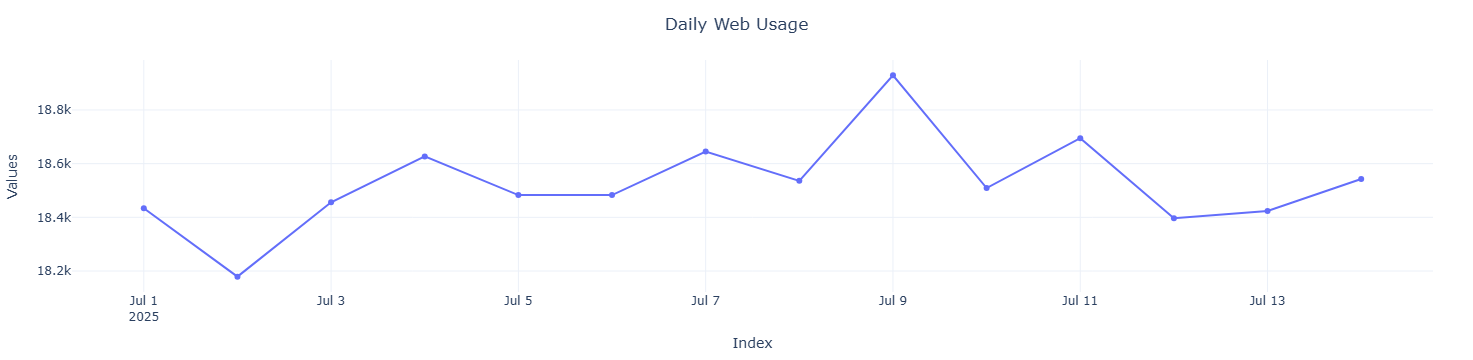

In [23]:
scatter_plot_series(series=daily_web_usage, title="Daily Web Usage")

In [24]:
web_visits_df['wellco_visit'] = web_visits_df['url'].str.contains('.wellco/')

In [25]:
wellco_visits_df = web_visits_df[web_visits_df['wellco_visit']]

In [26]:
daily_wellco_usage = wellco_visits_df.groupby(['date']).size()

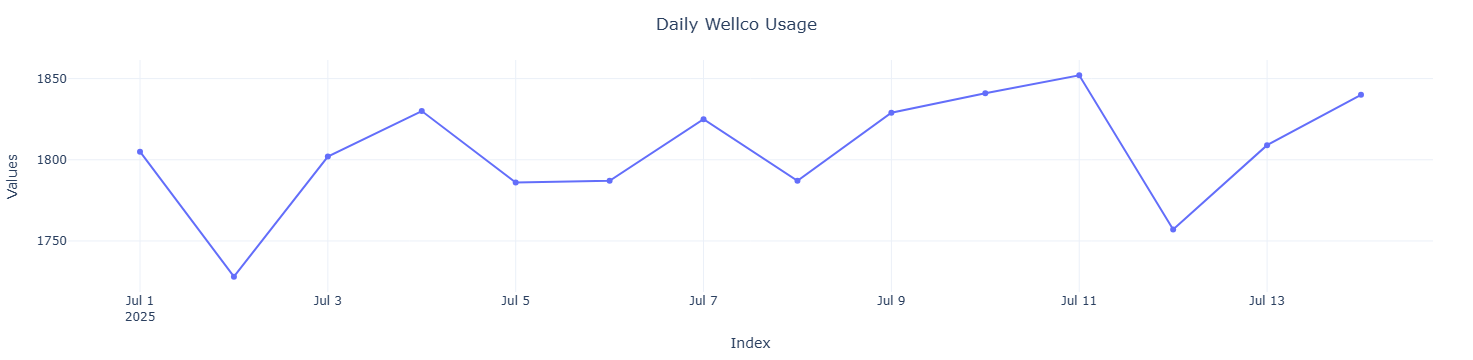

In [27]:
scatter_plot_series(series=daily_wellco_usage, title="Daily Wellco Usage")

In [32]:
wellco_visits_df.head(1)

,member_id,url,title,description,timestamp,date,wellco_visit
23065,902,https://health.wellco/diabetes/471,HbA1c targets,Improving glycemic control and blood glucose,2025-07-01 00:00:05,2025-07-01,True


In [34]:
wellco_visits_df[wellco_visits_df['member_id'] == 1000]

,member_id,url,title,description,timestamp,date,wellco_visit
25350,1000,https://health.wellco/fitness/307,Exercise routines,Cardio and strength workouts,2025-07-06 00:42:50,2025-07-06,True
25352,1000,https://health.wellco/sleep/761,Restorative sleep tips,Sleep apnea screening and hygiene,2025-07-14 15:29:45,2025-07-14,True


## Pre-processing

### Cohort Selection

In [2]:
from preprocessing.cohort_selection import get_cohort, get_control_group, get_full_member_ids
from utils.plot_utils import pie_plot

In [3]:
cohort_member_ids = get_cohort()
control_member_ids = get_control_group()

In [4]:
cohort_members = len(cohort_member_ids)
control_members = len(control_member_ids)

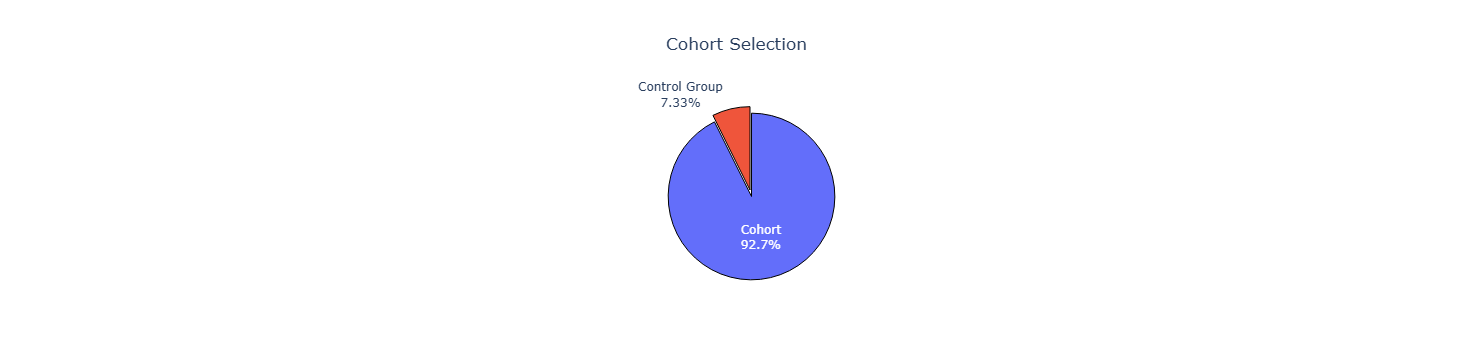

In [5]:
pie_plot(
    labels = ["Cohort", "Control Group"], 
    values = [cohort_members, control_members],
    title = "Cohort Selection", 
    pull = [0.08, 0], 
)   